# CSML1020 Machine Learning at Scale Project
## Birdsong Classifier
### Pete Gray YorkU# 217653247 ptgray@my.yorku.ca

For an initial exploration of the audio files, and features that can be observed within them, code is adapted from https://www.kaggle.com/ashishpatel26/feature-extraction-from-audio

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Load an audio file

In [12]:
import librosa
audio_path = 'data/train_set/train_set/train_aegithalos_caudatus.wav'
x , sr = librosa.load(audio_path)


### Test file and loading by playing a file

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

### Show Waveform

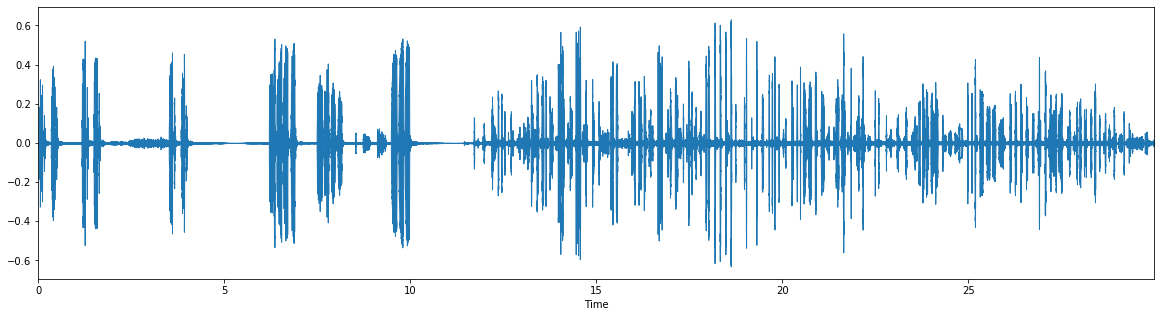

In [5]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

### Display Spectrogram

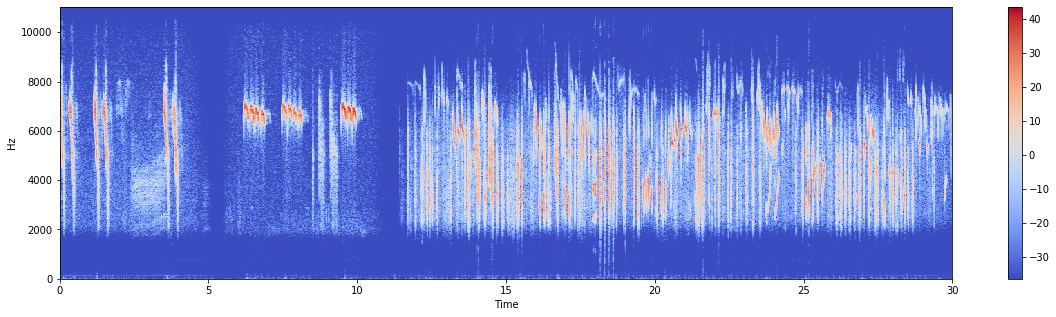

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log frequency axis

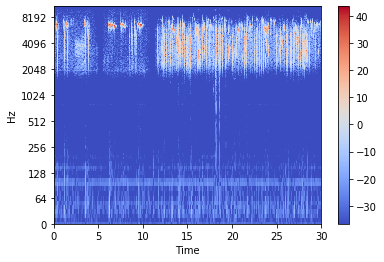

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Creating and Audio Signal
Making a Numpy thing out of the audio file

In [8]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [9]:
ipd.Audio(x, rate=sr) # load a NumPy array

### Save the signal

In [10]:
librosa.output.write_wav('data/tone_440.wav', x, sr) # writing wave file in tone440.wav format

### Zero Crossing Rate

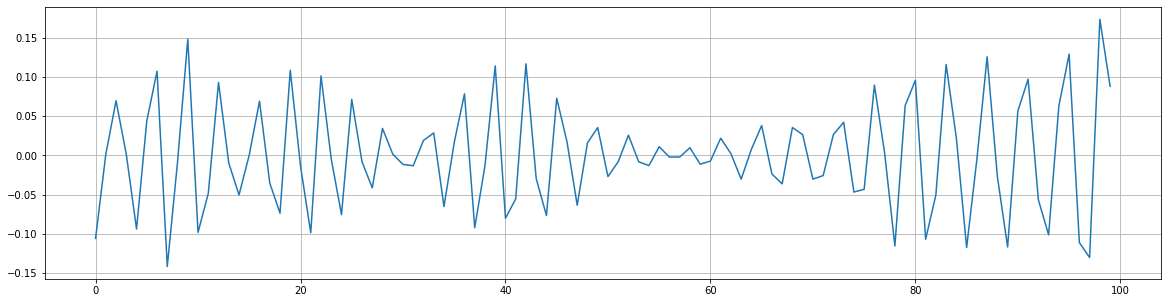

In [13]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [15]:
print(sum(zero_crossings))

57


### Spectral Centroids

In [16]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1292,)

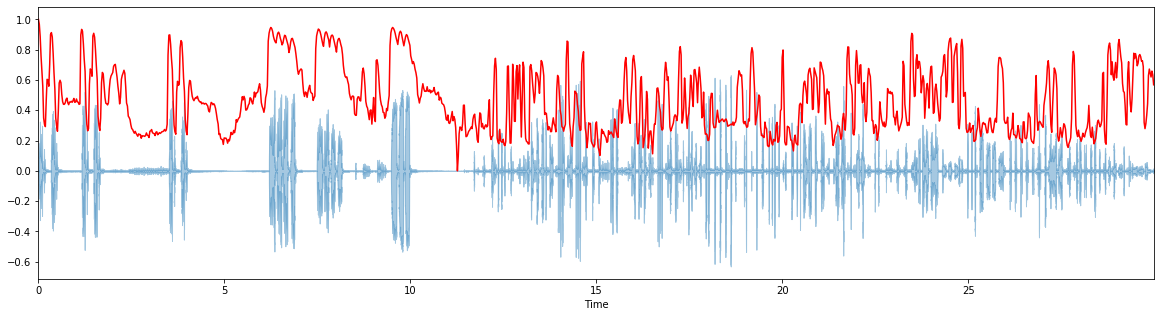

In [17]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Rolloff

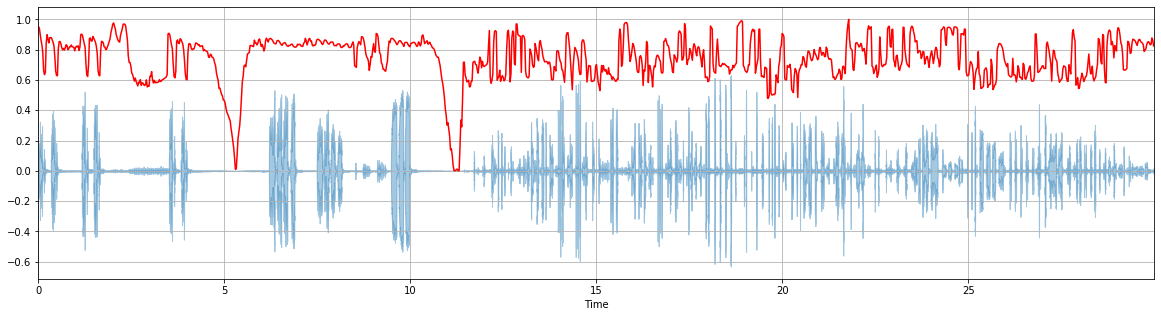

In [18]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

### MFCC

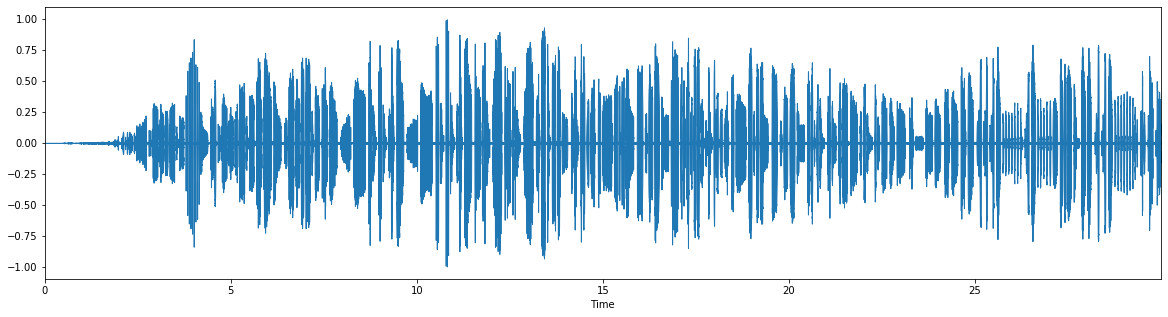

In [19]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('data/train_set/train_set/train_alauda_arvensis.wav')
librosa.display.waveplot(x, sr=sr)

(20, 1292)


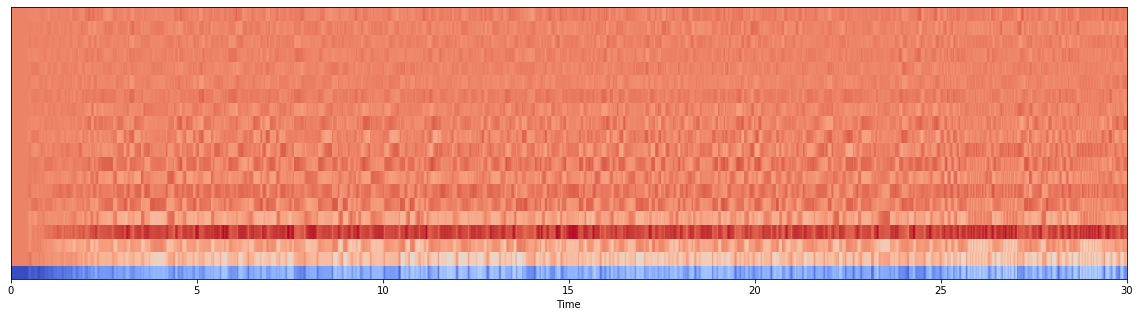

In [20]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Feature Scaling

In [21]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 5.6098489e-08  2.7311106e-08 -4.8901643e-09  3.3954350e-08
  4.0078589e-09 -1.0979803e-08  1.6349324e-08  1.0610734e-08
 -1.4485958e-08  2.3597350e-08  7.1045783e-09 -8.6731218e-09
  1.4578226e-08 -1.9376122e-08  6.2741732e-09 -2.6296167e-09
 -3.7829575e-09  1.8822519e-08  9.8725961e-09 -7.1507120e-09]
[1.         1.0000013  1.0000001  1.0000004  0.9999992  1.0000006
 1.0000002  0.9999997  1.0000006  0.9999999  0.9999994  1.000001
 0.99999857 0.99999964 0.9999997  1.0000004  1.0000006  1.0000002
 0.99999964 0.9999992 ]


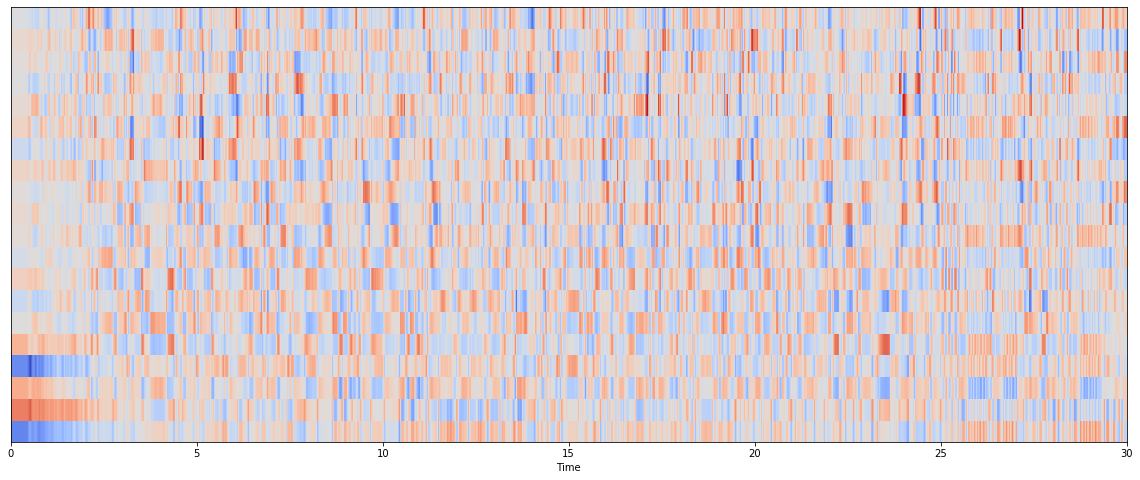

In [22]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma Frequencies

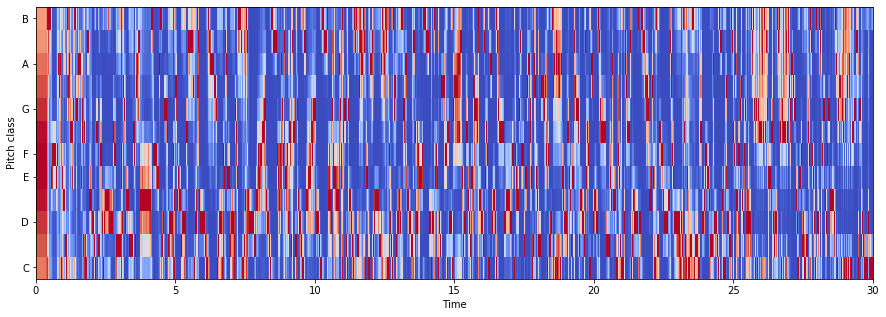

In [23]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')